1. data right skewed -> Log transformation
2. data left skewed -> Square transformation

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [28]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

C:\Users\rohit\AppData\Local\Temp\ipykernel_7928\2915957354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\rohit\AppData\Local\Temp\ipykernel_7928\1156133897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


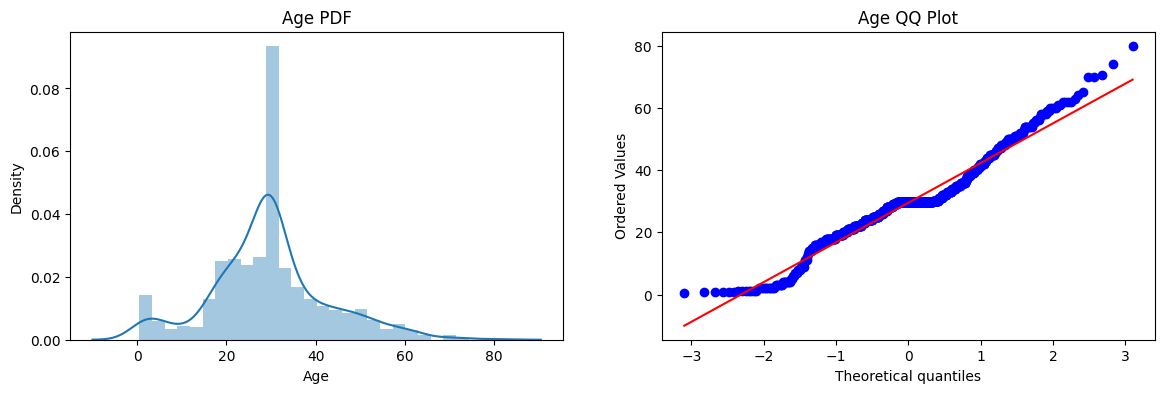

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_7928\582791122.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


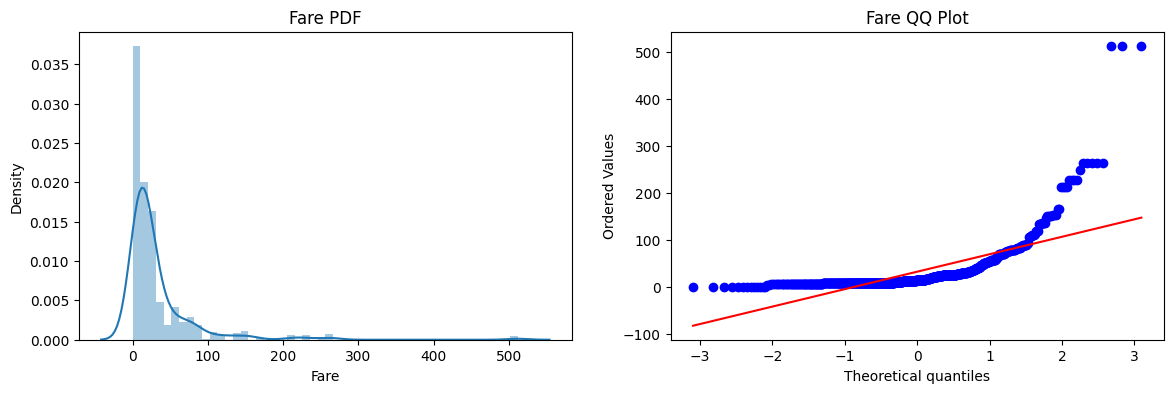

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [33]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [34]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("LR: ",accuracy_score(Y_test,y_pred1))
print("DT: ",accuracy_score(Y_test,y_pred2))

LR:  0.6480446927374302
DT:  0.6871508379888268


In [35]:
trf = FunctionTransformer(func=np.log1p)

In [36]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [37]:
clf1.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("LR transformed: ",accuracy_score(Y_test,y_pred1))
print("DT transformed: ",accuracy_score(Y_test,y_pred2))

LR transformed:  0.6815642458100558
DT transformed:  0.659217877094972


In [38]:
X_transformed = trf.fit_transform(X)

print("LR: ",np.mean(cross_val_score(clf1,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT: ",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))

LR:  0.678027465667915
DT:  0.6566292134831461


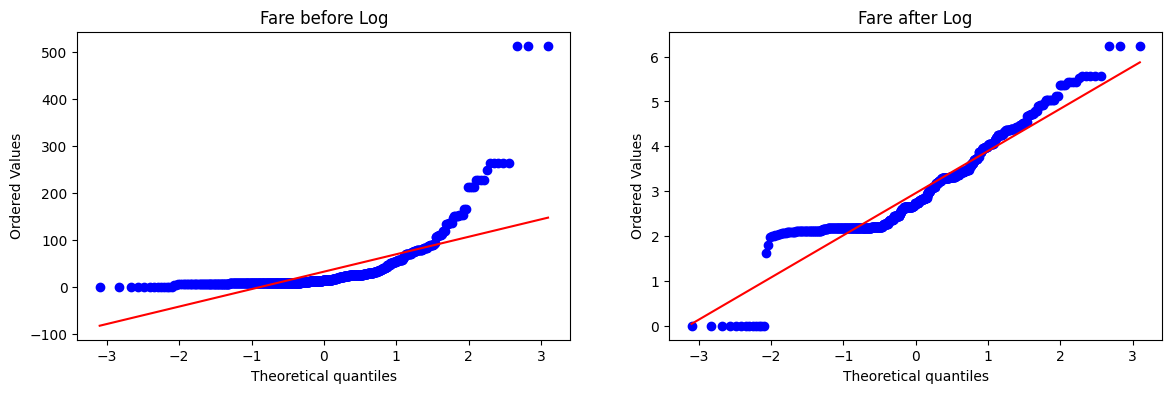

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare after Log')

plt.show()

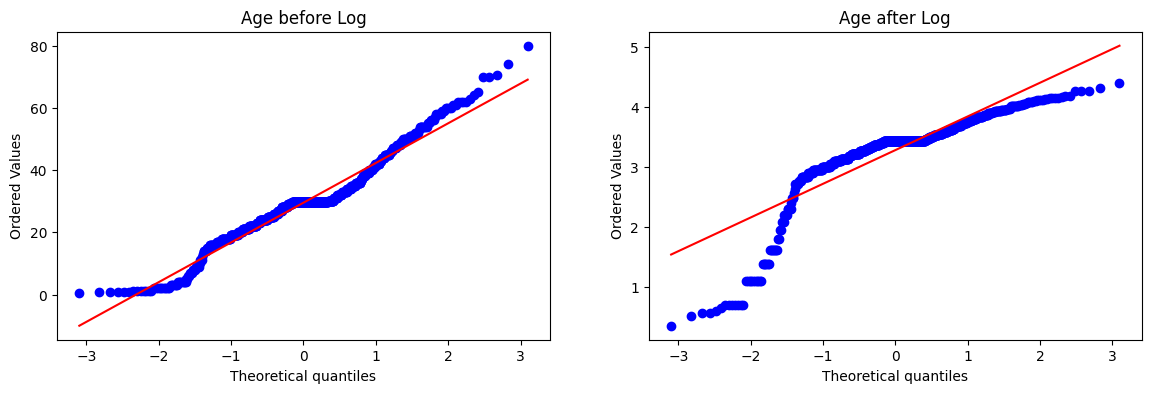

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age after Log')

plt.show()

In [42]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [43]:
clf1.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("LR : ",accuracy_score(Y_test,y_pred1))
print("DT : ",accuracy_score(Y_test,y_pred2))

LR :  0.6703910614525139
DT :  0.659217877094972


In [44]:
X_transformed2 = trf2.fit_transform(X)

print("LR: ",np.mean(cross_val_score(clf1,X_transformed2,Y,scoring='accuracy',cv=10)))
print("DT: ",np.mean(cross_val_score(clf2,X_transformed2,Y,scoring='accuracy',cv=10)))

LR:  0.6712609238451936
DT:  0.6599625468164794


In [45]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


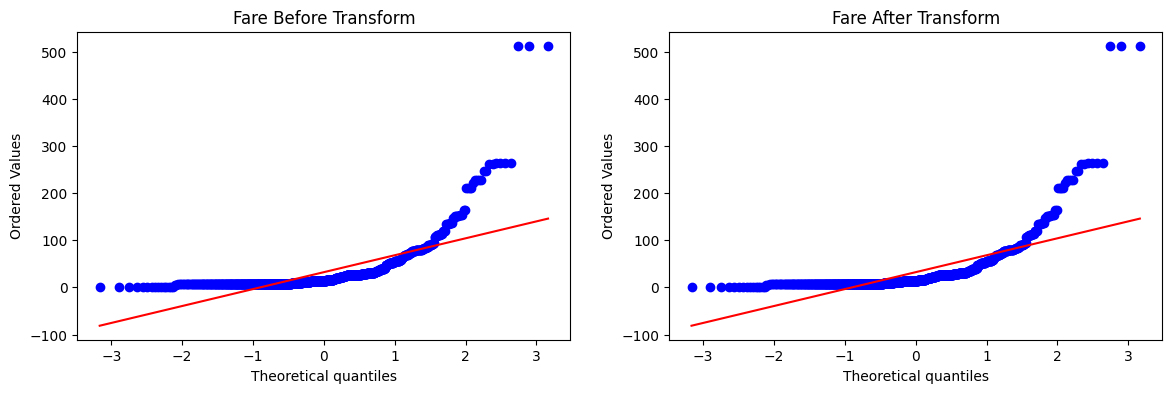

In [50]:
apply_transform(lambda x:x)

Accuracy 0.6431335830212235


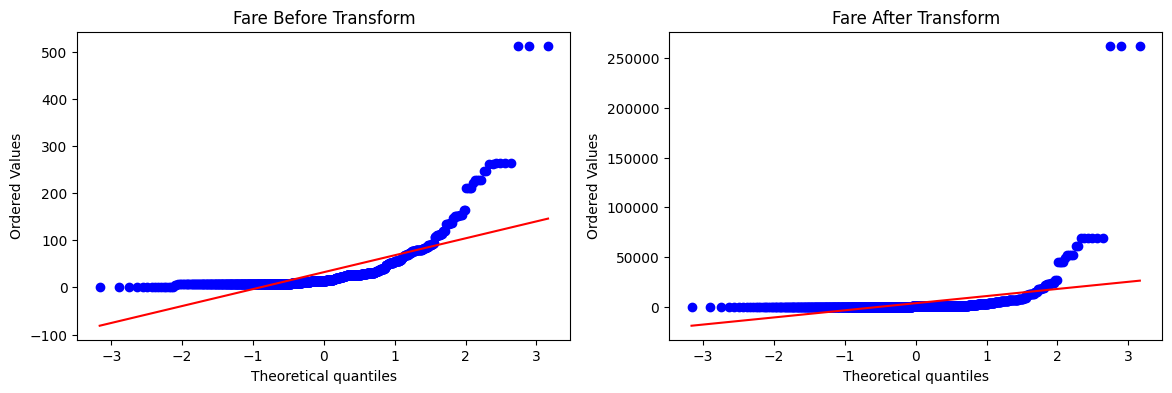

In [51]:
apply_transform(lambda x:x**2)

Accuracy 0.6589013732833957


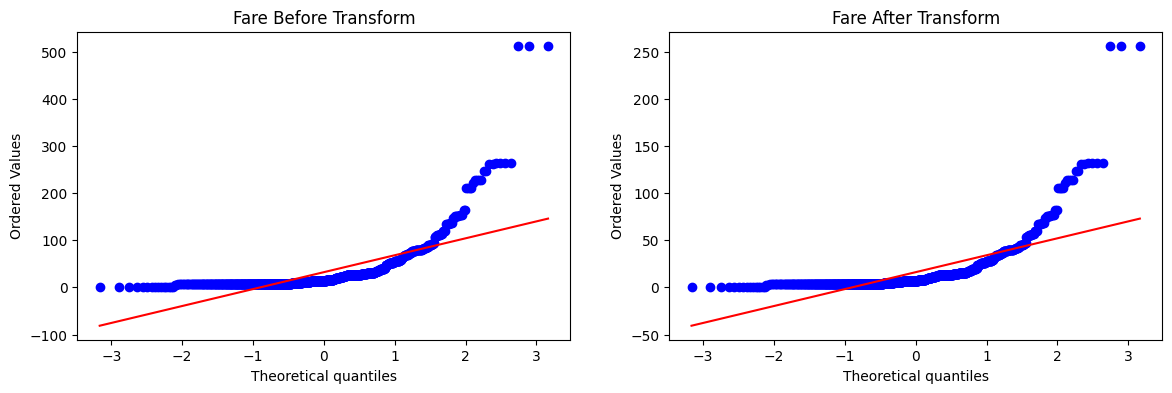

In [52]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


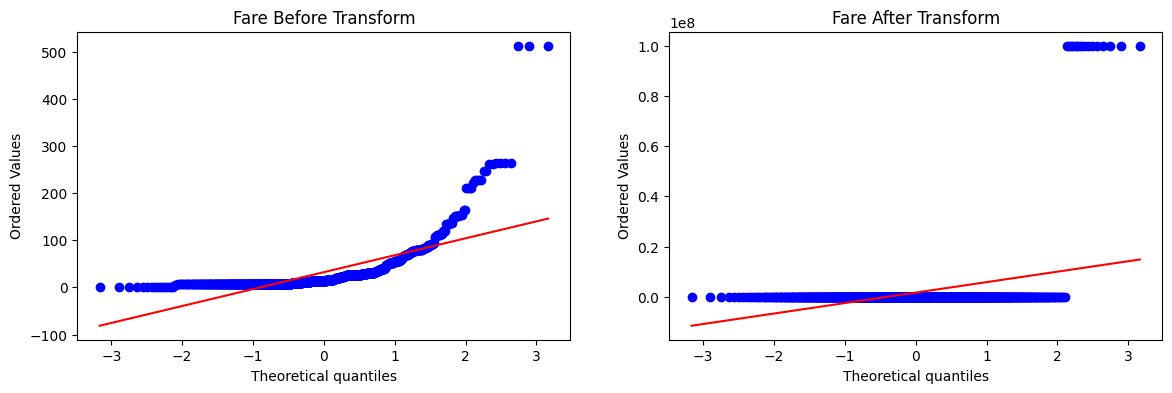

In [55]:
apply_transform(lambda x:1/(x+0.00000001))

Accuracy 0.6195131086142323


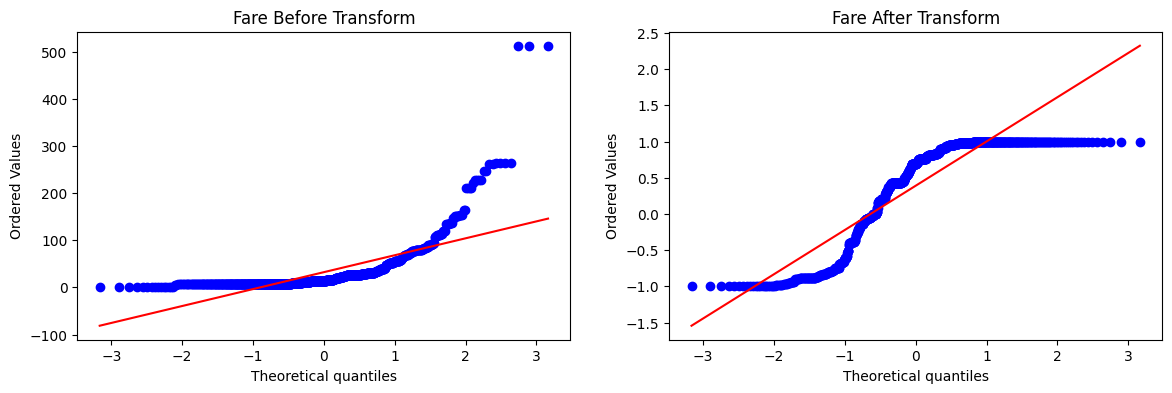

In [48]:
apply_transform(np.sin)